### Importando as bibliotecas

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# Funções de suavização
#from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [13]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('Dados//AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

In [14]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


O SimpleExpSmoothing é utilizado para prever séries temporais que não apresentam padrões de tendência e de sazonalidade claras

### Vamos usar o SimpleExpSmoothing na série temporal

In [16]:
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename(r'$alpha=0.2$') # Forecast de 12 meses

C:\Users\danilo portela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


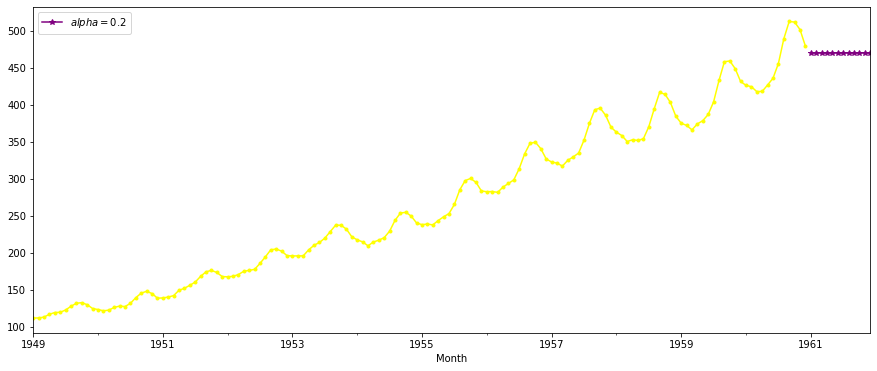

In [17]:
fcast1.plot(marker='*', color='purple', legend=True) # Previsão
fit1.fittedvalues.plot(marker='.', color='yellow') # Modelo, não é a série temporal

### Otimizando o valor de alpha

In [25]:
fit2 = SimpleExpSmoothing(data).fit() # Criando o modelo
fcast2 = fit2.forecast(12).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level']) # Previsão com o alpha otimizado automaticamente

C:\Users\danilo portela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


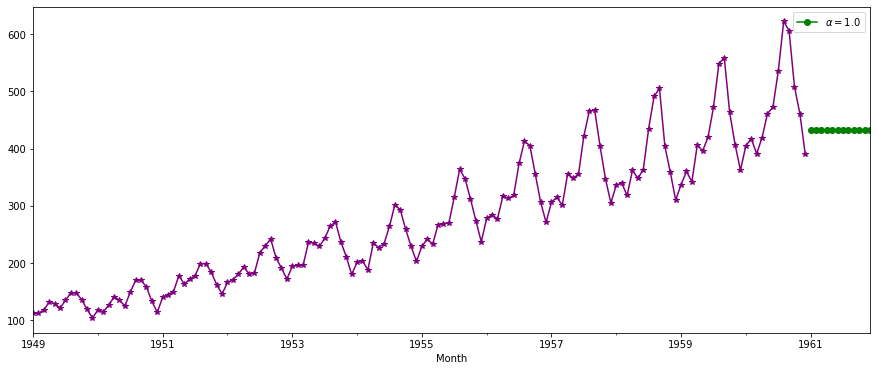

In [28]:
fcast2.plot(marker='o', color='green', legend=True) # Previsão
fit2.fittedvalues.plot(marker='*', color='purple') # Modelo